**Predict the price of books**

GOAL:

To build a Machine Learning model to predict the price of books based on a given set of features

# Exploring the DataSet

let's see provided data

In [1]:
import pandas as pd        #importing package to panelize data
train_data=pd.read_excel('Data_Train.xlsx')
test_data=pd.read_excel('Data_Test.xlsx')
submission=pd.read_excel('Sample_Submission.xlsx')

In [2]:
#let's see the data dimensions dims
print('dims of train_data: ',train_data.shape)
print('dims of test_data: ',test_data.shape)

dims of train_data:  (6237, 9)
dims of test_data:  (1560, 8)


In [3]:
print(f'there are {train_data.shape[0]} observations for train')
print(f'and there are {test_data.shape[0]} observations for test')

there are 6237 observations for train
and there are 1560 observations for test


see the first 5 records for both train and test

In [4]:
print('train_data: ',train_data.head())
print('\n test_data\n: ',test_data.head())

train_data:                                          Title  ...   Price
0         The Prisoner's Gold (The Hunters 3)  ...  220.00
1          Guru Dutt: A Tragedy in Three Acts  ...  202.93
2                Leviathan (Penguin Classics)  ...  299.00
3          A Pocket Full of Rye (Miss Marple)  ...  180.00
4  LIFE 70 Years of Extraordinary Photography  ...  965.62

[5 rows x 9 columns]

 test_data
:                                                 Title  ...                         BookCategory
0         The Complete Sherlock Holmes: 2 Boxes sets  ...            Crime, Thriller & Mystery
1  Learn Docker - Fundamentals of Docker 18.x: Ev...  ...  Computing, Internet & Digital Media
2                                           Big Girl  ...                              Romance
3  Think Python: How to Think Like a Computer Sci...  ...  Computing, Internet & Digital Media
4  Oxford Word Skills: Advanced - Idioms & Phrasa...  ...      Language, Linguistics & Writing

[5 rows x 8 columns]


let's see the column names of both

In [5]:
train_data.keys()

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [6]:
test_data.keys()

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory'],
      dtype='object')

let's see the required submission as well

In [7]:
submission.head()

,Price
0,119
1,123
2,108
3,118
4,132


yes, Datasets are okey. Then extract the features to feed into model

# Feature Extraction

In [8]:
#Let's see the train_data first

In [9]:
train_data

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00


Let's check for missing values

In [10]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

info

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


describe

In [12]:
train_data.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


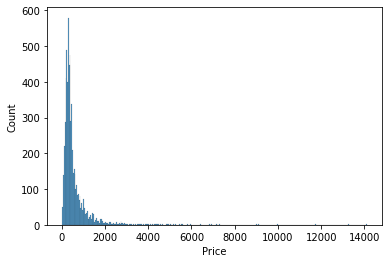

In [13]:
#Let's see the prices range

import matplotlib.pyplot as plt          # package for visualization
import seaborn as sns

sns.histplot(train_data['Price'])             #histogram

Observations for features

In [14]:
print(train_data.columns)
train_data.head(3)

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


remove unwanted features from both set

In [15]:
train_data.drop('Synopsis',axis=1,inplace=True)             #axis=1 over the columns, and axis=0 over the rows
test_data.drop('Synopsis',axis=1,inplace=True)

In [16]:
train_data.keys()

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

# preprocessing-cleaning,splitting

In [17]:
#preprocessed train,test set
X_train=pd.DataFrame()
X_test=pd.DataFrame()

Column wise preprocessing

## Title

In [18]:
#unique counts of title column,
train_data['Title'].value_counts()

A Game of Thrones (A Song of Ice and Fire)                      4
Casino Royale: James Bond 007 (Vintage)                         4
Shibumi: A Novel                                                3
Year One (Chronicles of The One)                                3
The Shape of Ideas: An Illustrated Exploration of Creativity    3
                                                               ..
Everything I Know About Love                                    1
Water: Asia's New Battleground                                  1
Turning Point                                                   1
Molecules of Emotion: The Science Behind Mind-Body Medicine     1
Bought To Carry His Heir (Harlequin Modern)                     1
Name: Title, Length: 5568, dtype: int64

In [19]:
#there are 5568 unique train titles

In [20]:
#let's see test titles,
test_data['Title'].value_counts()

Doing Justice: A Prosecutor’s Thoughts on Crime, Punishment and the Rule of Law    3
The Five Greatest Warriors (Jack West Series)                                      3
Storm and Silence: Volume 1 (Storm and Silence Saga)                               2
Ready Player One                                                                   2
Asterix and the Normans: Album 9                                                   2
                                                                                  ..
The Masqueraders                                                                   1
Pandolfini's Ultimate Guide to Chess (Fireside Chess Library)                      1
Boruto - Vol. 1                                                                    1
Dragon Ball (3-in-1 Edition), Vol. 6: Includes vols. 16, 17 & 18                   1
Precious Gifts                                                                     1
Name: Title, Length: 1521, dtype: int64

In [21]:
#1521 unique test titles

In [22]:
titles=list(train_data['Title'])
titles=[title.strip().upper() for title in titles]

In [23]:
X_train['Title']=titles
X_train

,Title
0,THE PRISONER'S GOLD (THE HUNTERS 3)
1,GURU DUTT: A TRAGEDY IN THREE ACTS
2,LEVIATHAN (PENGUIN CLASSICS)
3,A POCKET FULL OF RYE (MISS MARPLE)
4,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY
...,...
6232,HUMANS: A BRIEF HISTORY OF HOW WE F*CKED IT AL...
6233,THE CHEMIST
6234,THE DUKE AND I: NUMBER 1 IN SERIES (BRIDGERTON...
6235,FROSTFIRE (KANIN CHRONICLES)


In [24]:
#for test set
titles=list(test_data['Title'])
titles=[title.strip().upper() for title in titles]
X_test['Title']=titles
X_test

,Title
0,THE COMPLETE SHERLOCK HOLMES: 2 BOXES SETS
1,LEARN DOCKER - FUNDAMENTALS OF DOCKER 18.X: EV...
2,BIG GIRL
3,THINK PYTHON: HOW TO THINK LIKE A COMPUTER SCI...
4,OXFORD WORD SKILLS: ADVANCED - IDIOMS & PHRASA...
...,...
1555,100 THINGS EVERY DESIGNER NEEDS TO KNOW ABOUT ...
1556,"MODERN LETTER WRITING COURSE: PERSONAL, BUSINE..."
1557,THE KITE RUNNER GRAPHIC NOVEL
1558,PANZER LEADER (PENGUIN WORLD WAR II COLLECTION)


## Author , Genre, BookCategory

here we are splitting these 3 columns with same rules. bcz both columns have multiple names.

#### Author

In [25]:
train_data['Author']

0        Chris Kuzneski
1          Arun Khopkar
2         Thomas Hobbes
3       Agatha Christie
4       Editors of Life
             ...       
6232       Tom Phillips
6233    Stephenie Meyer
6234        Julia Quinn
6235     Amanda Hocking
6236        Jeff Abbott
Name: Author, Length: 6237, dtype: object

In [26]:
#we have to find maximum number of names in a single observation, bcz some books has multiple authors

In [27]:
# we can add / concat /extend with test autor names as well to find max authors per eg.

In [28]:
Authors1=list(train_data['Author'])
Authors2=list(test_data['Author'])

Authors1.extend(Authors2)
len(Authors1)

7797

In [29]:
Authors1[:6]               #first 6

['Chris Kuzneski',
 'Arun Khopkar',
 'Thomas Hobbes',
 'Agatha Christie',
 'Editors of Life',
 'Danny Dreyer']

In [30]:
# now we have a list contains all authors.
#lets make columns

In [31]:
# we seen some observation has multiple author names by writing coma separated.

In [32]:
#find max authors per an eg.
Authors_list=[i.split(',') for i in Authors1]
max=1
for i in Authors_list:
  if len(i) >= max:
    max=len(i)
print(f'maximum number of authors in an eg : {max}')


maximum number of authors in an eg : 7


In [33]:
#let's see the corresponding eg:
for i in range(len(Authors_list)):
  if len(Authors_list[i])==7:
    print(f'{i}th :')
    print(Authors_list[i])

7008th :
['Richard', 'Harris', ' Sam', 'Dennett', ' Daniel C.', 'Hitchens', ' Christopher Dawkins']


In [34]:
#now have to make empty columns and filling

In [35]:
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]

In [36]:
authors=list(train_data['Author'])
for i in authors:
  try:
    a1.append(i.split(',')[0].strip().upper())
  except:
    a1.append('NONE')
  try:
    a2.append(i.split(',')[1].strip().upper())
  except:
    a2.append('NONE')
  try:
    a3.append(i.split(',')[2].strip().upper())
  except:
    a3.append('NONE')
  try:
    a4.append(i.split(',')[3].strip().upper())
  except:
    a4.append('NONE')
  try:
    a5.append(i.split(',')[4].strip().upper())
  except:
    a5.append('NONE')
  try:
    a6.append(i.split(',')[5].strip().upper())
  except:
    a6.append('NONE')
  try:
    a7.append(i.split(',')[6].strip().upper())
  except:
    a7.append('NONE')                        
  

In [37]:
X_train['a1']=a1
X_train['a2']=a2
X_train['a3']=a3
X_train['a4']=a4
X_train['a5']=a5
X_train['a6']=a6
X_train['a7']=a7

In [38]:
X_train

,Title,a1,a2,a3,a4,a5,a6,a7
0,THE PRISONER'S GOLD (THE HUNTERS 3),CHRIS KUZNESKI,NONE,NONE,NONE,NONE,NONE,NONE
1,GURU DUTT: A TRAGEDY IN THREE ACTS,ARUN KHOPKAR,NONE,NONE,NONE,NONE,NONE,NONE
2,LEVIATHAN (PENGUIN CLASSICS),THOMAS HOBBES,NONE,NONE,NONE,NONE,NONE,NONE
3,A POCKET FULL OF RYE (MISS MARPLE),AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE
4,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,EDITORS OF LIFE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...
6232,HUMANS: A BRIEF HISTORY OF HOW WE F*CKED IT AL...,TOM PHILLIPS,NONE,NONE,NONE,NONE,NONE,NONE
6233,THE CHEMIST,STEPHENIE MEYER,NONE,NONE,NONE,NONE,NONE,NONE
6234,THE DUKE AND I: NUMBER 1 IN SERIES (BRIDGERTON...,JULIA QUINN,NONE,NONE,NONE,NONE,NONE,NONE
6235,FROSTFIRE (KANIN CHRONICLES),AMANDA HOCKING,NONE,NONE,NONE,NONE,NONE,NONE


In [39]:
#same for test set

In [40]:
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]

authors=list(test_data['Author'])
for i in authors:
  try:
    a1.append(i.split(',')[0].strip().upper())
  except:
    a1.append('NONE')
  try:
    a2.append(i.split(',')[1].strip().upper())
  except:
    a2.append('NONE')
  try:
    a3.append(i.split(',')[2].strip().upper())
  except:
    a3.append('NONE')
  try:
    a4.append(i.split(',')[3].strip().upper())
  except:
    a4.append('NONE')
  try:
    a5.append(i.split(',')[4].strip().upper())
  except:
    a5.append('NONE')
  try:
    a6.append(i.split(',')[5].strip().upper())
  except:
    a6.append('NONE')
  try:
    a7.append(i.split(',')[6].strip().upper())
  except:
    a7.append('NONE')

X_test['a1']=a1
X_test['a2']=a2
X_test['a3']=a3
X_test['a4']=a4
X_test['a5']=a5
X_test['a6']=a6
X_test['a7']=a7    

In [41]:
X_test

,Title,a1,a2,a3,a4,a5,a6,a7
0,THE COMPLETE SHERLOCK HOLMES: 2 BOXES SETS,SIR ARTHUR CONAN DOYLE,NONE,NONE,NONE,NONE,NONE,NONE
1,LEARN DOCKER - FUNDAMENTALS OF DOCKER 18.X: EV...,GABRIEL N. SCHENKER,NONE,NONE,NONE,NONE,NONE,NONE
2,BIG GIRL,DANIELLE STEEL,NONE,NONE,NONE,NONE,NONE,NONE
3,THINK PYTHON: HOW TO THINK LIKE A COMPUTER SCI...,ALLEN B. DOWNEY,NONE,NONE,NONE,NONE,NONE,NONE
4,OXFORD WORD SKILLS: ADVANCED - IDIOMS & PHRASA...,REDMAN GAIRNS,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...
1555,100 THINGS EVERY DESIGNER NEEDS TO KNOW ABOUT ...,SUSAN WEINSCHENK,NONE,NONE,NONE,NONE,NONE,NONE
1556,"MODERN LETTER WRITING COURSE: PERSONAL, BUSINE...",ARUN SAGAR,NONE,NONE,NONE,NONE,NONE,NONE
1557,THE KITE RUNNER GRAPHIC NOVEL,KHALED HOSSEINI,NONE,NONE,NONE,NONE,NONE,NONE
1558,PANZER LEADER (PENGUIN WORLD WAR II COLLECTION),HEINZ GUDERIAN,NONE,NONE,NONE,NONE,NONE,NONE


#### Genre

In [42]:
train_data['Genre']

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6237, dtype: object

In [43]:
#total unique counts
train_data['Genre'].value_counts()

Action & Adventure (Books)               947
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Rome                                       1
International Entrance Exams               1
Sustainable Development                    1
General Dentistry                          1
Nuclear Engineering                        1
Name: Genre, Length: 345, dtype: int64

In [44]:
#maximum how much names per an eg,
genre_list1=list(train_data['Genre'])
genre_list2=list(test_data['Genre'])
genre_list1.extend(genre_list2)
len(genre_list1)

7797

In [45]:
genre_list=[i.split(',') for i in genre_list1]
max=1
for i in range(len(genre_list)):
  if len(genre_list[i]) >= max:
    max=len(genre_list[i])
print('max length :',max)

max length : 2


In [46]:
# maximum 2 number of genre names. let's make 2 columns

In [47]:
g1=[]
g2=[]

gen_train=list(train_data['Genre'])

for i in gen_train:
  try:
    g1.append(i.split(',')[0].strip().upper())
  except:
    g1.append('NONE')
  try:
    g2.append(i.split(',')[1].strip().upper())
  except:
    g2.append('NONE')

In [48]:
#add to train data
X_train['g1']=g1
X_train['g2']=g2

In [49]:
X_train

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2
0,THE PRISONER'S GOLD (THE HUNTERS 3),CHRIS KUZNESKI,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE
1,GURU DUTT: A TRAGEDY IN THREE ACTS,ARUN KHOPKAR,NONE,NONE,NONE,NONE,NONE,NONE,CINEMA & BROADCAST (BOOKS),NONE
2,LEVIATHAN (PENGUIN CLASSICS),THOMAS HOBBES,NONE,NONE,NONE,NONE,NONE,NONE,INTERNATIONAL RELATIONS,NONE
3,A POCKET FULL OF RYE (MISS MARPLE),AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE
4,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,EDITORS OF LIFE,NONE,NONE,NONE,NONE,NONE,NONE,PHOTOGRAPHY TEXTBOOKS,NONE
...,...,...,...,...,...,...,...,...,...,...
6232,HUMANS: A BRIEF HISTORY OF HOW WE F*CKED IT AL...,TOM PHILLIPS,NONE,NONE,NONE,NONE,NONE,NONE,ANTHROPOLOGY (BOOKS),NONE
6233,THE CHEMIST,STEPHENIE MEYER,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE
6234,THE DUKE AND I: NUMBER 1 IN SERIES (BRIDGERTON...,JULIA QUINN,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE
6235,FROSTFIRE (KANIN CHRONICLES),AMANDA HOCKING,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE


In [50]:
#for test genre
g1=[]
g2=[]
genre_test=list(test_data['Genre'])
for i in genre_test:
  try:
    g1.append(i.split(',')[0].strip().upper())
  except:
    g1.append('NONE')
  try:
    g2.append(i.split(',')[1].strip().upper())
  except:
    g2.append('NONE')

X_test['g1']=g1
X_test['g2']=g2

X_test

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2
0,THE COMPLETE SHERLOCK HOLMES: 2 BOXES SETS,SIR ARTHUR CONAN DOYLE,NONE,NONE,NONE,NONE,NONE,NONE,SHORT STORIES (BOOKS),NONE
1,LEARN DOCKER - FUNDAMENTALS OF DOCKER 18.X: EV...,GABRIEL N. SCHENKER,NONE,NONE,NONE,NONE,NONE,NONE,OPERATING SYSTEMS TEXTBOOKS,NONE
2,BIG GIRL,DANIELLE STEEL,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE
3,THINK PYTHON: HOW TO THINK LIKE A COMPUTER SCI...,ALLEN B. DOWNEY,NONE,NONE,NONE,NONE,NONE,NONE,PROGRAMMING & SOFTWARE DEVELOPMENT (BOOKS),NONE
4,OXFORD WORD SKILLS: ADVANCED - IDIOMS & PHRASA...,REDMAN GAIRNS,NONE,NONE,NONE,NONE,NONE,NONE,LINGUISTICS (BOOKS),NONE
...,...,...,...,...,...,...,...,...,...,...
1555,100 THINGS EVERY DESIGNER NEEDS TO KNOW ABOUT ...,SUSAN WEINSCHENK,NONE,NONE,NONE,NONE,NONE,NONE,DESIGN,NONE
1556,"MODERN LETTER WRITING COURSE: PERSONAL, BUSINE...",ARUN SAGAR,NONE,NONE,NONE,NONE,NONE,NONE,CHILDREN'S REFERENCE (BOOKS),NONE
1557,THE KITE RUNNER GRAPHIC NOVEL,KHALED HOSSEINI,NONE,NONE,NONE,NONE,NONE,NONE,HUMOUR (BOOKS),NONE
1558,PANZER LEADER (PENGUIN WORLD WAR II COLLECTION),HEINZ GUDERIAN,NONE,NONE,NONE,NONE,NONE,NONE,UNITED STATES HISTORY,NONE


#### BookCategory

In [51]:
train_data['BookCategory']

0                         Action & Adventure
1       Biographies, Diaries & True Accounts
2                                     Humour
3                  Crime, Thriller & Mystery
4                   Arts, Film & Photography
                        ...                 
6232                                  Humour
6233               Crime, Thriller & Mystery
6234                                 Romance
6235                      Action & Adventure
6236                      Action & Adventure
Name: BookCategory, Length: 6237, dtype: object

In [52]:
#unique counts
train_data['BookCategory'].value_counts()

Action & Adventure                      818
Crime, Thriller & Mystery               723
Biographies, Diaries & True Accounts    596
Language, Linguistics & Writing         594
Comics & Mangas                         583
Romance                                 560
Humour                                  540
Arts, Film & Photography                517
Computing, Internet & Digital Media     510
Sports                                  471
Politics                                325
Name: BookCategory, dtype: int64

In [53]:
#max counts per eg.
bc_list1=list(train_data['BookCategory'])
bc_list2=list(test_data['BookCategory'])
bc_list1.extend(bc_list2)
len(bc_list1)

7797

In [54]:
bc_list=[i.split(',') for i in bc_list1]

max=1
for i in range(len(bc_list)):
  if len(bc_list[i]) >= max:
    max=len(bc_list[i])

print('max length :',max)

max length : 2


In [55]:
#here also 2 names, let's make 2 columns

In [56]:
bc1=[]
bc2=[]

bc_train=list(train_data['BookCategory'])

for i in bc_train:
  try:
    bc1.append(i.split(',')[0].strip().upper())
  except:
    bc1.append('NONE')
  try:
    bc2.append(i.split(',')[1].strip().upper())
  except:
    bc2.append('NONE')

In [57]:
X_train['bc1']=bc1
X_train['bc2']=bc2
X_train

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2
0,THE PRISONER'S GOLD (THE HUNTERS 3),CHRIS KUZNESKI,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE,ACTION & ADVENTURE,NONE
1,GURU DUTT: A TRAGEDY IN THREE ACTS,ARUN KHOPKAR,NONE,NONE,NONE,NONE,NONE,NONE,CINEMA & BROADCAST (BOOKS),NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS
2,LEVIATHAN (PENGUIN CLASSICS),THOMAS HOBBES,NONE,NONE,NONE,NONE,NONE,NONE,INTERNATIONAL RELATIONS,NONE,HUMOUR,NONE
3,A POCKET FULL OF RYE (MISS MARPLE),AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE,CRIME,THRILLER & MYSTERY
4,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,EDITORS OF LIFE,NONE,NONE,NONE,NONE,NONE,NONE,PHOTOGRAPHY TEXTBOOKS,NONE,ARTS,FILM & PHOTOGRAPHY
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,HUMANS: A BRIEF HISTORY OF HOW WE F*CKED IT AL...,TOM PHILLIPS,NONE,NONE,NONE,NONE,NONE,NONE,ANTHROPOLOGY (BOOKS),NONE,HUMOUR,NONE
6233,THE CHEMIST,STEPHENIE MEYER,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE,CRIME,THRILLER & MYSTERY
6234,THE DUKE AND I: NUMBER 1 IN SERIES (BRIDGERTON...,JULIA QUINN,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE,ROMANCE,NONE
6235,FROSTFIRE (KANIN CHRONICLES),AMANDA HOCKING,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE,ACTION & ADVENTURE,NONE


In [58]:
#for test as well

bc1=[]
bc2=[]

bc_test=list(test_data['BookCategory'])

for i in bc_test:
  try:
    bc1.append(i.split(',')[0].strip().upper())
  except:
    bc1.append('NONE')
  try:
    bc2.append(i.split(',')[1].strip().upper())
  except:
    bc2.append('NONE')

X_test['bc1']=bc1
X_test['bc2']=bc2
X_test

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2
0,THE COMPLETE SHERLOCK HOLMES: 2 BOXES SETS,SIR ARTHUR CONAN DOYLE,NONE,NONE,NONE,NONE,NONE,NONE,SHORT STORIES (BOOKS),NONE,CRIME,THRILLER & MYSTERY
1,LEARN DOCKER - FUNDAMENTALS OF DOCKER 18.X: EV...,GABRIEL N. SCHENKER,NONE,NONE,NONE,NONE,NONE,NONE,OPERATING SYSTEMS TEXTBOOKS,NONE,COMPUTING,INTERNET & DIGITAL MEDIA
2,BIG GIRL,DANIELLE STEEL,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE,ROMANCE,NONE
3,THINK PYTHON: HOW TO THINK LIKE A COMPUTER SCI...,ALLEN B. DOWNEY,NONE,NONE,NONE,NONE,NONE,NONE,PROGRAMMING & SOFTWARE DEVELOPMENT (BOOKS),NONE,COMPUTING,INTERNET & DIGITAL MEDIA
4,OXFORD WORD SKILLS: ADVANCED - IDIOMS & PHRASA...,REDMAN GAIRNS,NONE,NONE,NONE,NONE,NONE,NONE,LINGUISTICS (BOOKS),NONE,LANGUAGE,LINGUISTICS & WRITING
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,100 THINGS EVERY DESIGNER NEEDS TO KNOW ABOUT ...,SUSAN WEINSCHENK,NONE,NONE,NONE,NONE,NONE,NONE,DESIGN,NONE,COMPUTING,INTERNET & DIGITAL MEDIA
1556,"MODERN LETTER WRITING COURSE: PERSONAL, BUSINE...",ARUN SAGAR,NONE,NONE,NONE,NONE,NONE,NONE,CHILDREN'S REFERENCE (BOOKS),NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS
1557,THE KITE RUNNER GRAPHIC NOVEL,KHALED HOSSEINI,NONE,NONE,NONE,NONE,NONE,NONE,HUMOUR (BOOKS),NONE,HUMOUR,NONE
1558,PANZER LEADER (PENGUIN WORLD WAR II COLLECTION),HEINZ GUDERIAN,NONE,NONE,NONE,NONE,NONE,NONE,UNITED STATES HISTORY,NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS


## Edition

In [59]:
train_data['Edition']

0       Paperback,– 10 Mar 2016
1        Paperback,– 7 Nov 2012
2       Paperback,– 25 Feb 1982
3        Paperback,– 5 Oct 2017
4       Hardcover,– 10 Oct 2006
                 ...           
6232     Paperback,– 8 Aug 2018
6233    Paperback,– 21 Nov 2016
6234     Paperback,– 8 Jun 2006
6235    Paperback,– 15 Jan 2015
6236    Paperback,– 21 Dec 2016
Name: Edition, Length: 6237, dtype: object

In [60]:
#here we can seperate or split 3 different columns for type,month,year

In [61]:
#type
ed_train_list=list(train_data['Edition'])
ed_type=[i.split(',–')[0].strip().upper() for i in ed_train_list]

#for month and year

ed_date=[i.split(',–')[1].strip() for i in ed_train_list]
ed_month=[i.split()[-2] for i in ed_train_list]
#some months have shortage in Edition column,will handle
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ed_month=[i if i in months else 'NA' for i in ed_month ]
ed_year=[i.split()[-1] for i in ed_train_list]
print('type :',ed_type)
print('month :',ed_month)
print('year :',ed_year)

type : ['PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'MASS MARKET PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'HARDCOVER', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'SHEET MUSIC', 'MASS MARKET PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'HARDCOVER', 'PAPERBACK', 'PAPERBACK', 'PAPERBACK', 'PAP

In [62]:
#let's add
X_train['type']=ed_type
X_train['month']=ed_month
X_train['year']=ed_year

In [63]:
X_train

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year
0,THE PRISONER'S GOLD (THE HUNTERS 3),CHRIS KUZNESKI,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE,ACTION & ADVENTURE,NONE,PAPERBACK,Mar,2016
1,GURU DUTT: A TRAGEDY IN THREE ACTS,ARUN KHOPKAR,NONE,NONE,NONE,NONE,NONE,NONE,CINEMA & BROADCAST (BOOKS),NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,PAPERBACK,Nov,2012
2,LEVIATHAN (PENGUIN CLASSICS),THOMAS HOBBES,NONE,NONE,NONE,NONE,NONE,NONE,INTERNATIONAL RELATIONS,NONE,HUMOUR,NONE,PAPERBACK,Feb,1982
3,A POCKET FULL OF RYE (MISS MARPLE),AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE,CRIME,THRILLER & MYSTERY,PAPERBACK,Oct,2017
4,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,EDITORS OF LIFE,NONE,NONE,NONE,NONE,NONE,NONE,PHOTOGRAPHY TEXTBOOKS,NONE,ARTS,FILM & PHOTOGRAPHY,HARDCOVER,Oct,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,HUMANS: A BRIEF HISTORY OF HOW WE F*CKED IT AL...,TOM PHILLIPS,NONE,NONE,NONE,NONE,NONE,NONE,ANTHROPOLOGY (BOOKS),NONE,HUMOUR,NONE,PAPERBACK,Aug,2018
6233,THE CHEMIST,STEPHENIE MEYER,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE,CRIME,THRILLER & MYSTERY,PAPERBACK,Nov,2016
6234,THE DUKE AND I: NUMBER 1 IN SERIES (BRIDGERTON...,JULIA QUINN,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE,ROMANCE,NONE,PAPERBACK,Jun,2006
6235,FROSTFIRE (KANIN CHRONICLES),AMANDA HOCKING,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE,ACTION & ADVENTURE,NONE,PAPERBACK,Jan,2015


In [64]:
#for test set as well,

In [65]:
ed_test_list=list(test_data['Edition'])
ed_type=[i.split(',–')[0].strip().upper() for i in ed_test_list]

#for month and year

ed_date=[i.split(',–')[1].strip() for i in ed_test_list]
ed_month=[i.split()[-2] for i in ed_test_list]
#some months have shortage in Edition column,will handle
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ed_month=[i if i in months else 'NA' for i in ed_month ]
ed_year=[i.split()[-1] for i in ed_test_list]

X_test['type']=ed_type
X_test['month']=ed_month
X_test['year']=ed_year

In [66]:
X_test

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year
0,THE COMPLETE SHERLOCK HOLMES: 2 BOXES SETS,SIR ARTHUR CONAN DOYLE,NONE,NONE,NONE,NONE,NONE,NONE,SHORT STORIES (BOOKS),NONE,CRIME,THRILLER & MYSTERY,MASS MARKET PAPERBACK,Oct,1986
1,LEARN DOCKER - FUNDAMENTALS OF DOCKER 18.X: EV...,GABRIEL N. SCHENKER,NONE,NONE,NONE,NONE,NONE,NONE,OPERATING SYSTEMS TEXTBOOKS,NONE,COMPUTING,INTERNET & DIGITAL MEDIA,PAPERBACK,Apr,2018
2,BIG GIRL,DANIELLE STEEL,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE,ROMANCE,NONE,PAPERBACK,Mar,2011
3,THINK PYTHON: HOW TO THINK LIKE A COMPUTER SCI...,ALLEN B. DOWNEY,NONE,NONE,NONE,NONE,NONE,NONE,PROGRAMMING & SOFTWARE DEVELOPMENT (BOOKS),NONE,COMPUTING,INTERNET & DIGITAL MEDIA,PAPERBACK,NA,2016
4,OXFORD WORD SKILLS: ADVANCED - IDIOMS & PHRASA...,REDMAN GAIRNS,NONE,NONE,NONE,NONE,NONE,NONE,LINGUISTICS (BOOKS),NONE,LANGUAGE,LINGUISTICS & WRITING,PAPERBACK,Dec,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,100 THINGS EVERY DESIGNER NEEDS TO KNOW ABOUT ...,SUSAN WEINSCHENK,NONE,NONE,NONE,NONE,NONE,NONE,DESIGN,NONE,COMPUTING,INTERNET & DIGITAL MEDIA,PAPERBACK,Apr,2011
1556,"MODERN LETTER WRITING COURSE: PERSONAL, BUSINE...",ARUN SAGAR,NONE,NONE,NONE,NONE,NONE,NONE,CHILDREN'S REFERENCE (BOOKS),NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,PAPERBACK,May,2013
1557,THE KITE RUNNER GRAPHIC NOVEL,KHALED HOSSEINI,NONE,NONE,NONE,NONE,NONE,NONE,HUMOUR (BOOKS),NONE,HUMOUR,NONE,PAPERBACK,Sep,2011
1558,PANZER LEADER (PENGUIN WORLD WAR II COLLECTION),HEINZ GUDERIAN,NONE,NONE,NONE,NONE,NONE,NONE,UNITED STATES HISTORY,NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,PAPERBACK,Sep,2009


###Rating and Reviews

In [67]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62


In [68]:
#here Ratings and Reviews mislabeled each other. and we can apply directly

In [69]:
X_train['Reviews']=[i.split()[0] for i in list(train_data['Ratings'])]
X_train['Ratings']=[i.split()[0] for i in list(train_data['Reviews'])]

#similarly for test
X_test['Reviews']=[i.split()[0] for i in list(test_data['Ratings'])]
X_test['Ratings']=[i.split()[0] for i in list(test_data['Reviews'])]

In [70]:
X_train.shape

(6237, 17)

##Labels

In [71]:
y_train=train_data['Price']
y_train.shape

(6237,)

Finished Feature Extraction

Let's see features

### X_train

In [72]:
X_train.head()

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year,Reviews,Ratings
0,THE PRISONER'S GOLD (THE HUNTERS 3),CHRIS KUZNESKI,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE,ACTION & ADVENTURE,NONE,PAPERBACK,Mar,2016,8,4.0
1,GURU DUTT: A TRAGEDY IN THREE ACTS,ARUN KHOPKAR,NONE,NONE,NONE,NONE,NONE,NONE,CINEMA & BROADCAST (BOOKS),NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,PAPERBACK,Nov,2012,14,3.9
2,LEVIATHAN (PENGUIN CLASSICS),THOMAS HOBBES,NONE,NONE,NONE,NONE,NONE,NONE,INTERNATIONAL RELATIONS,NONE,HUMOUR,NONE,PAPERBACK,Feb,1982,6,4.8
3,A POCKET FULL OF RYE (MISS MARPLE),AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE,CONTEMPORARY FICTION (BOOKS),NONE,CRIME,THRILLER & MYSTERY,PAPERBACK,Oct,2017,13,4.1
4,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,EDITORS OF LIFE,NONE,NONE,NONE,NONE,NONE,NONE,PHOTOGRAPHY TEXTBOOKS,NONE,ARTS,FILM & PHOTOGRAPHY,HARDCOVER,Oct,2006,1,5.0


### X_test

In [73]:
X_test

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year,Reviews,Ratings
0,THE COMPLETE SHERLOCK HOLMES: 2 BOXES SETS,SIR ARTHUR CONAN DOYLE,NONE,NONE,NONE,NONE,NONE,NONE,SHORT STORIES (BOOKS),NONE,CRIME,THRILLER & MYSTERY,MASS MARKET PAPERBACK,Oct,1986,960,4.4
1,LEARN DOCKER - FUNDAMENTALS OF DOCKER 18.X: EV...,GABRIEL N. SCHENKER,NONE,NONE,NONE,NONE,NONE,NONE,OPERATING SYSTEMS TEXTBOOKS,NONE,COMPUTING,INTERNET & DIGITAL MEDIA,PAPERBACK,Apr,2018,1,5.0
2,BIG GIRL,DANIELLE STEEL,NONE,NONE,NONE,NONE,NONE,NONE,ROMANCE (BOOKS),NONE,ROMANCE,NONE,PAPERBACK,Mar,2011,4,5.0
3,THINK PYTHON: HOW TO THINK LIKE A COMPUTER SCI...,ALLEN B. DOWNEY,NONE,NONE,NONE,NONE,NONE,NONE,PROGRAMMING & SOFTWARE DEVELOPMENT (BOOKS),NONE,COMPUTING,INTERNET & DIGITAL MEDIA,PAPERBACK,NA,2016,11,4.1
4,OXFORD WORD SKILLS: ADVANCED - IDIOMS & PHRASA...,REDMAN GAIRNS,NONE,NONE,NONE,NONE,NONE,NONE,LINGUISTICS (BOOKS),NONE,LANGUAGE,LINGUISTICS & WRITING,PAPERBACK,Dec,2011,9,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,100 THINGS EVERY DESIGNER NEEDS TO KNOW ABOUT ...,SUSAN WEINSCHENK,NONE,NONE,NONE,NONE,NONE,NONE,DESIGN,NONE,COMPUTING,INTERNET & DIGITAL MEDIA,PAPERBACK,Apr,2011,4,5.0
1556,"MODERN LETTER WRITING COURSE: PERSONAL, BUSINE...",ARUN SAGAR,NONE,NONE,NONE,NONE,NONE,NONE,CHILDREN'S REFERENCE (BOOKS),NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,PAPERBACK,May,2013,13,3.6
1557,THE KITE RUNNER GRAPHIC NOVEL,KHALED HOSSEINI,NONE,NONE,NONE,NONE,NONE,NONE,HUMOUR (BOOKS),NONE,HUMOUR,NONE,PAPERBACK,Sep,2011,5,4.0
1558,PANZER LEADER (PENGUIN WORLD WAR II COLLECTION),HEINZ GUDERIAN,NONE,NONE,NONE,NONE,NONE,NONE,UNITED STATES HISTORY,NONE,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,PAPERBACK,Sep,2009,3,3.5


In [74]:
###preprocessing

##LabelEncoding

In [75]:
#before that just describe it
X_train.describe(include='all')

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year,Reviews,Ratings
count,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237,6237
unique,5564,3633,264,73,21,5,1,1,345,27,11,6,19,13,64,342,36
top,A GAME OF THRONES (A SONG OF ICE AND FIRE),AGATHA CHRISTIE,NONE,NONE,NONE,NONE,NONE,NONE,ACTION & ADVENTURE (BOOKS),NONE,ACTION & ADVENTURE,NONE,PAPERBACK,Oct,2018,1,5.0
freq,4,69,5929,6159,6214,6233,6237,6237,947,5594,818,3297,5193,639,811,1040,1375


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    6237 non-null   object
 1   a1       6237 non-null   object
 2   a2       6237 non-null   object
 3   a3       6237 non-null   object
 4   a4       6237 non-null   object
 5   a5       6237 non-null   object
 6   a6       6237 non-null   object
 7   a7       6237 non-null   object
 8   g1       6237 non-null   object
 9   g2       6237 non-null   object
 10  bc1      6237 non-null   object
 11  bc2      6237 non-null   object
 12  type     6237 non-null   object
 13  month    6237 non-null   object
 14  year     6237 non-null   object
 15  Reviews  6237 non-null   object
 16  Ratings  6237 non-null   object
dtypes: object(17)
memory usage: 828.5+ KB


######we have to encode,

* Title
* all authors -a1,a2,a3,a4,a5,a6,a7
* all book category - bc1,bc2
* all genres-g1,g2
* type -
* months



In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
#title
le_title=LabelEncoder()
list1=list(X_train['Title'])
list2=list(X_test['Title'])
list1.extend(list2)
le_title.fit(list(set(list1)))   
X_train['Title']=le_title.transform(X_train['Title'])
X_test['Title']=le_title.transform(X_test['Title'])  #for test title

In [79]:
#Author
list1=list(X_train['a1'])
list2=list(X_train['a2'])+list(X_train['a3'])+list(X_train['a4'])+list(X_train['a5'])+list(X_train['a6'])+list(X_train['a7']) + list(X_test['a1']) + list(X_test['a2'])+list(X_test['a3'])+list(X_test['a4'])+list(X_test['a5'])+list(X_test['a6'])+list(X_test['a7'])

list1.extend(list2)
lists=list(set(list1))

le_author=LabelEncoder()
le_author.fit(lists)
X_train['a1']=le_author.transform(X_train['a1'])
X_train['a2']=le_author.transform(X_train['a2'])
X_train['a3']=le_author.transform(X_train['a3'])
X_train['a4']=le_author.transform(X_train['a4'])
X_train['a5']=le_author.transform(X_train['a5'])
X_train['a6']=le_author.transform(X_train['a6'])
X_train['a7']=le_author.transform(X_train['a7'])

X_test['a1']=le_author.transform(X_test['a1'])
X_test['a2']=le_author.transform(X_test['a2'])
X_test['a3']=le_author.transform(X_test['a3'])
X_test['a4']=le_author.transform(X_test['a4'])
X_test['a5']=le_author.transform(X_test['a5'])
X_test['a6']=le_author.transform(X_test['a6'])
X_test['a7']=le_author.transform(X_test['a7'])

In [80]:
#book category
le_bc=LabelEncoder()
list1=list(X_train['bc1'])
list2=list(X_train['bc2'])+list(X_test['bc1'])+list(X_test['bc2'])
list1.extend(list2)
lists=list(set(list1))

le_bc.fit(lists)
X_train['bc1']=le_bc.transform(X_train['bc1'])
X_train['bc2']=le_bc.transform(X_train['bc2'])
X_test['bc1']=le_bc.transform(X_test['bc1'])
X_test['bc2']=le_bc.transform(X_test['bc2'])

In [81]:
#genre
le_gen=LabelEncoder()
list1=list(X_train['g1'])
list2=list(X_train['g2'])+list(X_test['g1'])+list(X_test['g2'])
list1.extend(list2)
lists=list(set(list1))

le_gen.fit(lists)
X_train['g1']=le_gen.transform(X_train['g1'])
X_train['g2']=le_gen.transform(X_train['g2'])
X_test['g1']=le_gen.transform(X_test['g1'])
X_test['g2']=le_gen.transform(X_test['g2'])

In [82]:
#type
le_type=LabelEncoder()
list1=list(X_train['type'])
list2=list(X_test['type'])
list1.extend(list2)
le_type.fit(list(set(list1)))   
X_train['type']=le_type.transform(X_train['type'])
X_test['type']=le_type.transform(X_test['type'])

In [83]:
#month
le_month=LabelEncoder()
list1=list(X_train['month'])
list2=list(X_test['month'])
list1.extend(list2)
le_month.fit(list(set(list1)))   
X_train['month']=le_month.transform(X_train['month'])
X_test['month']=le_month.transform(X_test['month'])

In [84]:
#see the final data

In [85]:
#X_train
X_train

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year,Reviews,Ratings
0,5802,797,3073,3073,3073,3073,3073,3073,0,267,0,12,13,7,2016,8,4.0
1,2120,391,3073,3073,3073,3073,3073,3073,80,267,2,6,13,10,2012,14,3.9
2,2984,4353,3073,3073,3073,3073,3073,3073,211,267,8,12,13,3,1982,6,4.8
3,189,78,3073,3073,3073,3073,3073,3073,98,267,5,16,13,11,2017,13,4.1
4,2987,1221,3073,3073,3073,3073,3073,3073,284,267,1,7,8,11,2006,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,2390,4416,3073,3073,3073,3073,3073,3073,16,267,8,12,13,1,2018,2,5.0
6233,5034,4137,3073,3073,3073,3073,3073,3073,98,267,5,16,13,10,2016,9,3.3
6234,5191,2153,3073,3073,3073,3073,3073,3073,314,267,14,12,13,6,2006,3,3.8
6235,1910,180,3073,3073,3073,3073,3073,3073,0,267,0,12,13,4,2015,4,3.5


In [86]:
#X_test
X_test

,Title,a1,a2,a3,a4,a5,a6,a7,g1,g2,bc1,bc2,type,month,year,Reviews,Ratings
0,5082,4058,3073,3073,3073,3073,3073,3073,324,267,5,16,12,11,1986,960,4.4
1,2906,1401,3073,3073,3073,3073,3073,3073,273,267,4,9,13,0,2018,1,5.0
2,751,949,3073,3073,3073,3073,3073,3073,314,267,14,12,13,7,2011,4,5.0
3,6232,169,3073,3073,3073,3073,3073,3073,295,267,4,9,13,9,2016,11,4.1
4,3790,3505,3073,3073,3073,3073,3073,3073,235,267,10,11,13,2,2011,9,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,16,4236,3073,3073,3073,3073,3073,3073,107,267,4,9,13,0,2011,4,5.0
1556,3316,394,3073,3073,3073,3073,3073,3073,74,267,2,6,13,8,2013,13,3.6
1557,5481,2311,3073,3073,3073,3073,3073,3073,196,267,8,12,13,12,2011,5,4.0
1558,3807,1631,3073,3073,3073,3073,3073,3073,374,267,2,6,13,12,2009,3,3.5


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    6237 non-null   int64 
 1   a1       6237 non-null   int64 
 2   a2       6237 non-null   int64 
 3   a3       6237 non-null   int64 
 4   a4       6237 non-null   int64 
 5   a5       6237 non-null   int64 
 6   a6       6237 non-null   int64 
 7   a7       6237 non-null   int64 
 8   g1       6237 non-null   int64 
 9   g2       6237 non-null   int64 
 10  bc1      6237 non-null   int64 
 11  bc2      6237 non-null   int64 
 12  type     6237 non-null   int64 
 13  month    6237 non-null   int64 
 14  year     6237 non-null   object
 15  Reviews  6237 non-null   object
 16  Ratings  6237 non-null   object
dtypes: int64(14), object(3)
memory usage: 828.5+ KB


In [88]:
#let's clean all objects: year,reviews,ratings

In [89]:
X_train['year'].value_counts()

2018       811
2017       757
2016       659
2015       519
2014       402
          ... 
1961         1
1969         1
Edition      1
1905         1
1900         1
Name: year, Length: 64, dtype: int64

In [90]:
X_train['Ratings'].value_counts()

5.0    1375
4.0     570
4.5     507
4.6     394
4.4     389
4.3     359
4.7     343
4.2     324
4.1     310
3.9     241
4.8     222
3.8     190
3.7     167
3.0     138
3.5     115
3.6     110
4.9      75
3.4      75
3.3      57
3.1      49
1.0      49
3.2      41
2.0      39
2.9      26
2.5      18
2.7      16
2.8      10
2.3       7
1.5       5
2.6       4
2.4       4
2.2       3
1.4       2
2.1       1
1.7       1
1.6       1
Name: Ratings, dtype: int64

In [91]:
X_train['Reviews'].value_counts()

1        1040
2         708
3         491
4         355
5         300
         ... 
358         1
732         1
2,255       1
695         1
3,135       1
Name: Reviews, Length: 342, dtype: int64

In [92]:
#feature conversion from string to numeric >>> for normali

X_train['Reviews'] = pd.to_numeric(X_train['Reviews'],errors='coerce')
X_train['Ratings'] = pd.to_numeric(X_train['Ratings'],errors='coerce')
X_train['year'] = pd.to_numeric(X_train['year'],errors='coerce')

X_test['Reviews'] = pd.to_numeric(X_test['Reviews'],errors='coerce')
X_test['Ratings'] = pd.to_numeric(X_test['Ratings'],errors='coerce')
X_test['year'] = pd.to_numeric(X_test['year'],errors='coerce')

In [93]:
#beautyyy....coool

# Normalization / Standardization

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
sc=StandardScaler()

In [96]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

import numpy as np
y_train=np.array(y_train)
y_train=y_train.reshape((len(y_train),1))
y_train=sc.fit_transform(y_train)
y_train=y_train.ravel()

In [97]:
#let's see final data to feed ML model

In [98]:
X_train

array([[ 1.22489462, -1.11014305,  0.10361038, ...,  0.52064999,
        -0.26015575, -0.44260333],
       [-0.64983923, -1.40876249,  0.10361038, ...,  0.0156591 ,
        -0.18894124, -0.59355848],
       [-0.20992341,  1.50535127,  0.10361038, ..., -3.77177256,
        -0.28389392,  0.76503793],
       ...,
       [ 0.91379674, -0.11278358,  0.10361038, ..., -0.74182723,
        -0.31950118, -0.74451364],
       [-0.75676322, -1.56395633,  0.10361038, ...,  0.39440227,
        -0.30763209, -1.19737911],
       [ 0.95096556, -0.2951915 ,  0.10361038, ...,  0.52064999,
        -0.33137026, -0.59355848]])

In [99]:
X_test

array([[ 8.76574044e-01,  1.31098347e+00,  1.17711709e-01, ...,
        -3.46719247e+00,  1.25256504e+01,  1.40222654e-01],
       [-2.19218967e-01, -6.91991772e-01,  1.17711709e-01, ...,
         8.06161640e-01, -3.41842876e-01,  1.03918433e+00],
       [-1.30443677e+00, -1.03273126e+00,  1.17711709e-01, ...,
        -1.28634571e-01, -3.01590029e-01,  1.03918433e+00],
       ...,
       [ 1.07750300e+00, -5.98971227e-03,  1.17711709e-01, ...,
        -1.28634571e-01, -2.88172414e-01, -4.59085128e-01],
       [ 2.34507826e-01, -5.18606636e-01,  1.17711709e-01, ...,
        -3.95719203e-01, -3.15007645e-01, -1.20821986e+00],
       [-1.11055795e+00, -1.39457850e+00,  1.17711709e-01, ...,
         5.39077009e-01, -3.28425260e-01,  2.90049600e-01]])

In [100]:
y_train

array([-0.49373942, -0.51847656, -0.37925584, ..., -0.23433993,
       -0.35027266, -0.15753449])

In [101]:
#shape as well,
print('shape of X_train :',X_train.shape)
print('shape of X_test :',X_test.shape)
print('shape of y_train :',y_train.shape)

shape of X_train : (6237, 17)
shape of X_test : (1560, 17)
shape of y_train : (6237,)


# Model

XGBoost

In [102]:
from xgboost import XGBRegressor

In [103]:
#to chech the model, how it's. providing validation set

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=120)

In [105]:
xgb=XGBRegressor( objective='reg:squarederror', max_depth=6, learning_rate=0.1,
                 n_estimators=100, booster = 'gbtree', n_jobs = -1,random_state = 1)
xgb.fit(x_train,y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [106]:
y_pred = sc.inverse_transform(xgb.predict(x_val))
y_true = sc.inverse_transform(y_val)

error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
score = 1 - error

print("RMLSE Score = ", score)

RMLSE Score =  0.7020649670029482


In [107]:
#not bad.

In [108]:
#go with entire

In [109]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [110]:
y_pred_xgb = sc.inverse_transform(xgb.predict(X_test))

In [111]:
solution = pd.DataFrame(y_pred_xgb, columns = ['Price'])
solution.to_excel('Predict_Book_Price_Soln.xlsx', index = False)

In [112]:
solution


,Price
0,726.268677
1,1530.033691
2,599.988708
3,1080.226929
4,435.678467
...,...
1555,843.745056
1556,298.364929
1557,461.778320
1558,350.294891
